# POD basis
POD basis test on the 64-dimensional digits dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

import pysensors as ps

In [5]:
digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target

n_samples, n_features = X.shape
print(n_samples, n_features)

1083 64


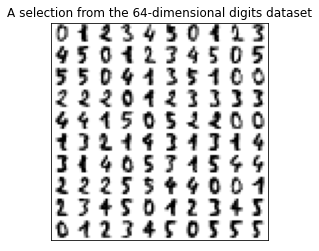

In [7]:
# Plot some digits
n_img_per_row = 10
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')
plt.show()

In [16]:
# Feed into SensorSelector with a POD basis
model = ps.SensorSelector(basis=ps.basis.POD(n_components=20))
model.fit(X)
model.set_number_of_sensors(10)
sensors = model.get_selected_sensors()
print(sensors)

[12 35 53 50 28 19  5 37 21 18]


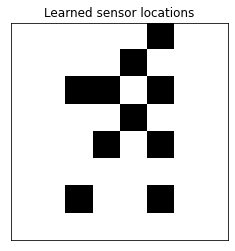

In [17]:
# Plot sensor locations
img = np.zeros(64)
img[sensors] = 16

plt.imshow(img.reshape(8, 8), cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('Learned sensor locations')
plt.show()